In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv(r'C:\Users\HP\Downloads/survey lung cancer.csv')

# Ensure all column names are properly formatted (replace spaces with underscores)
df.columns = [col.replace(' ', '_') for col in df.columns]
display(df.head())

target = 'LUNG_CANCER'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC_DISEASE  FATIGUE_  ALLERGY_  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO


Inference: The Dataset consists of 16 features & 309 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE_               309 non-null    int64 
 8   ALLERGY_               309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
#Checking the number of unique rows in each feature

df.nunique().sort_values()

GENDER                    2
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE_                  2
ALLERGY_                  2
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               2
AGE                      39
dtype: int64

In [5]:
#Checking the number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 14 categorical features.


In [6]:
# Display summary statistics
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC_DISEASE    FATIGUE_    ALLERGY_    WHEEZING  ALCOHOL_CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

                               Visualising Categorical Features:                                


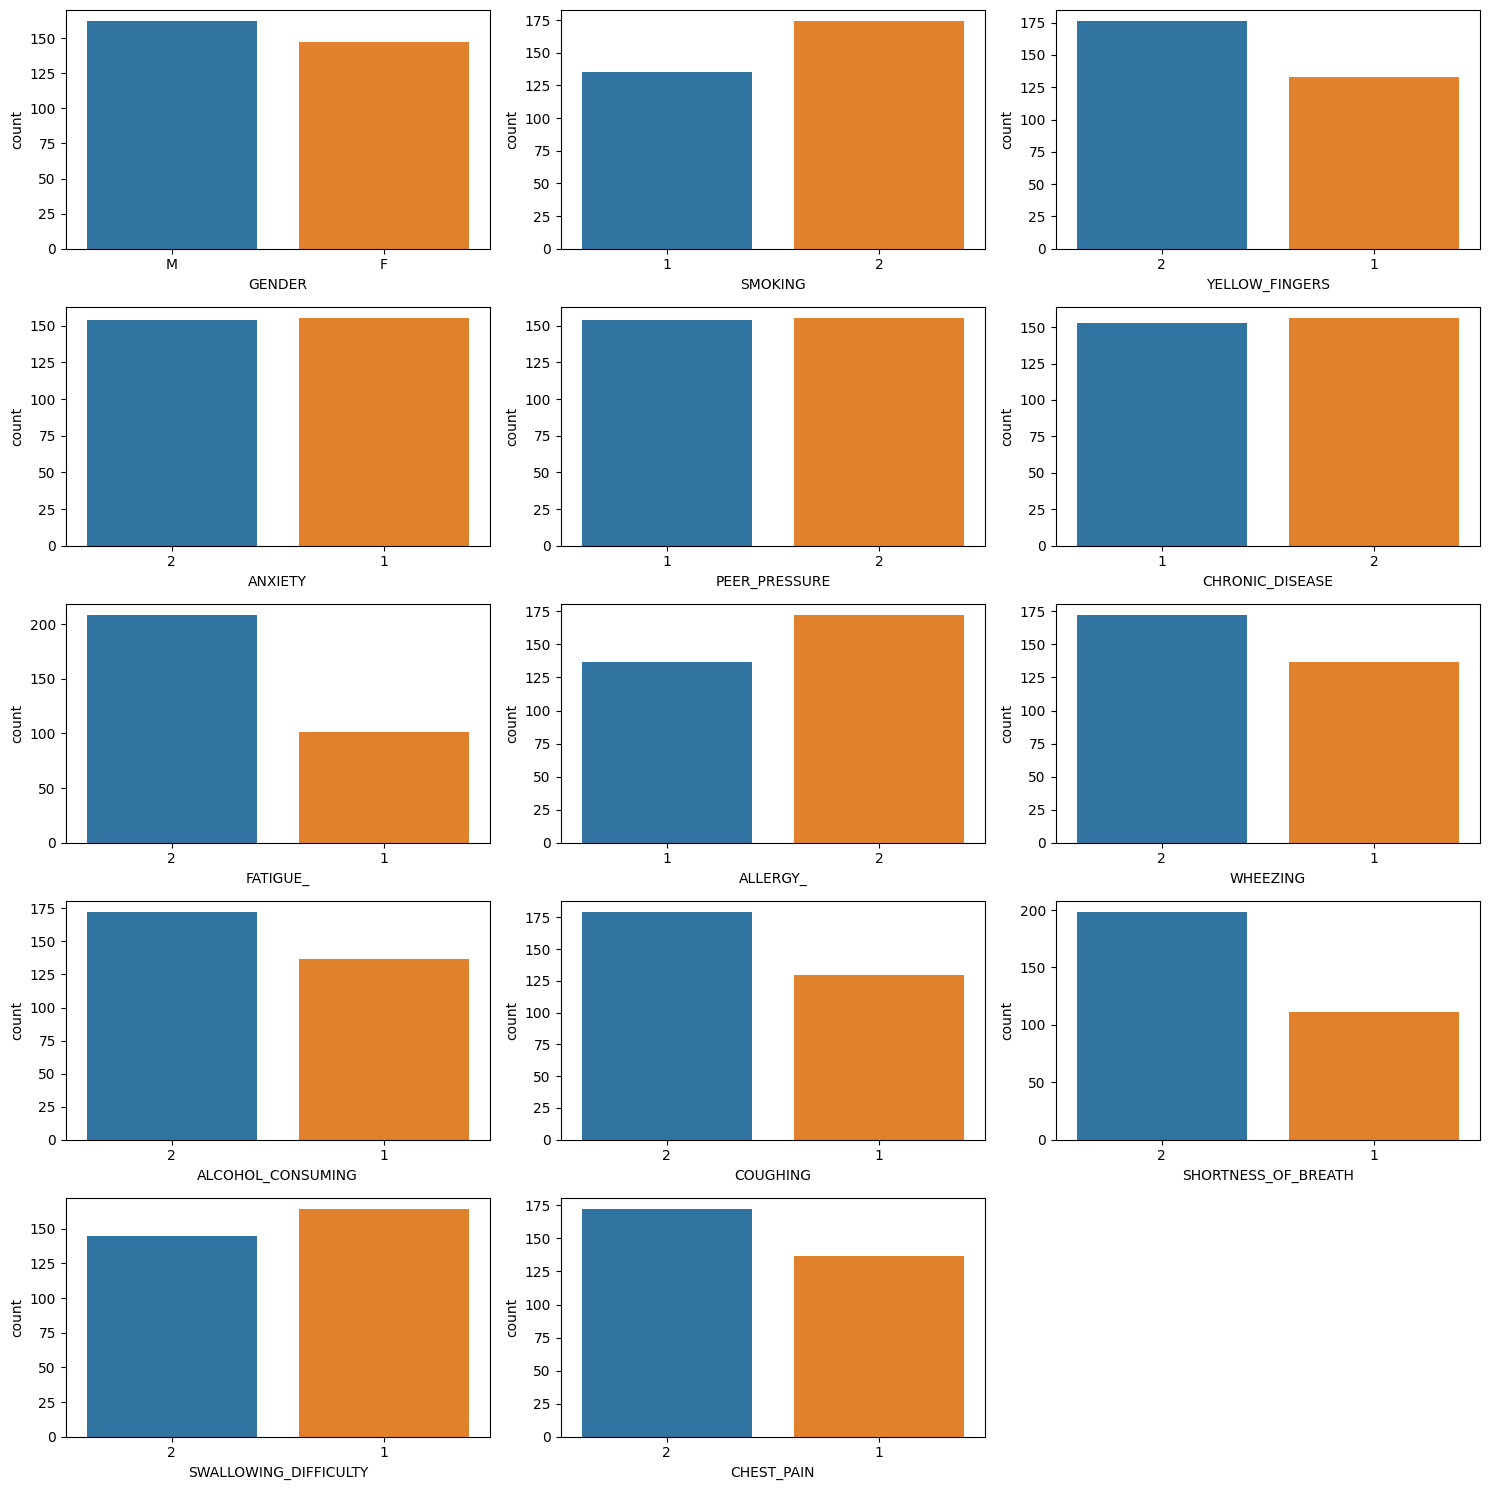

In [7]:
#Visualising the categorical features 

# Ensure all columns in cf are treated as strings
for col in cf:
    df[col] = df[col].astype(str)

print('\033[1mVisualising Categorical Features:'.center(100))

n = 3
plt.figure(figsize=[15, 3 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf) / n), n, i + 1)
    sns.countplot(x=df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


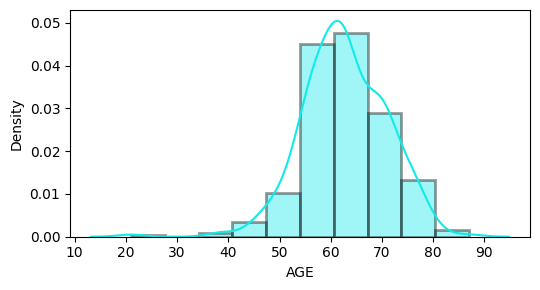

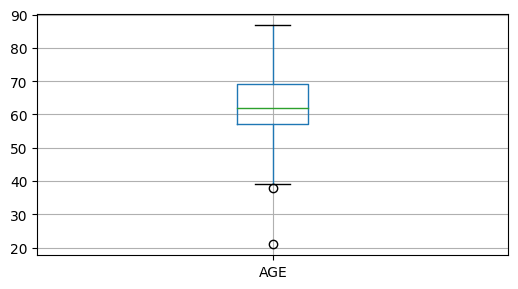

In [8]:
#Visualising the numeric features 

# Ensure all columns in cf are treated as strings
for col in cf:
    df[col] = df[col].astype(str)
print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [9]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 33


In [10]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                       Total Null Values  Percentage
GENDER                                 0         0.0
AGE                                    0         0.0
SMOKING                                0         0.0
YELLOW_FINGERS                         0         0.0
ANXIETY                                0         0.0
PEER_PRESSURE                          0         0.0
CHRONIC_DISEASE                        0         0.0
FATIGUE_                               0         0.0
ALLERGY_                               0         0.0
WHEEZING                               0         0.0
ALCOHOL_CONSUMING                      0         0.0
COUGHING                               0         0.0
SHORTNESS_OF_BREATH                    0         0.0
SWALLOWING_DIFFICULTY                  0         0.0
CHEST_PAIN                             0         0.0
LUNG_CANCER                            0         0.0


In [11]:
#dataframe conversion from categorical to numeric
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        0               1        1              0   
1         1   74        1               0        0              0   
2         0   59        0               0        0              1   
3         1   63        1               1        1              0   
4         0   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
279       0   59        0               1        1              1   
280       0   59        1               0        0              0   
281       1   55        1               0        0              0   
282       1   46        0               1        1              0   
283       1   60        0               1        1              0   

     CHRONIC_DISEASE  FATIGUE_  ALLERGY_  WHEEZING  ALCOHOL_CONSUMING  \
0                  0         1         0         1                  1   
1                  1         1         1         0                  0   
2                  0         1         0         1                  0   
3                  0         0         0         0                  1   
4                  0         0         0         1                  0   
..               ...       ...       ...       ...                ...   
279                0         0         1         1                  0   
280                1         1         1         0                  0   
281                0         1         1         0                  0   
282                0         0         0         0                  0   
283                0         1         0         1                  1   

     COUGHING  SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  \
0           1                    1                      1           1   
1           0                    1                      1           1   
2           1                    1                      0           1   
3           0                    0                      1           1   
4           1                    1                      0           0   
..        ...                  ...                    ...         ...   
279         1                    0                      1           0   
280         0                    1                      0           0   
281         0                    1                      0           1   
282         0                    0                      1           1   
283         1                    1                      1           1   

     LUNG_CANCER  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
279            1  
280            0  
281            0  
282            0  
283            1  

[276 rows x 16 columns]

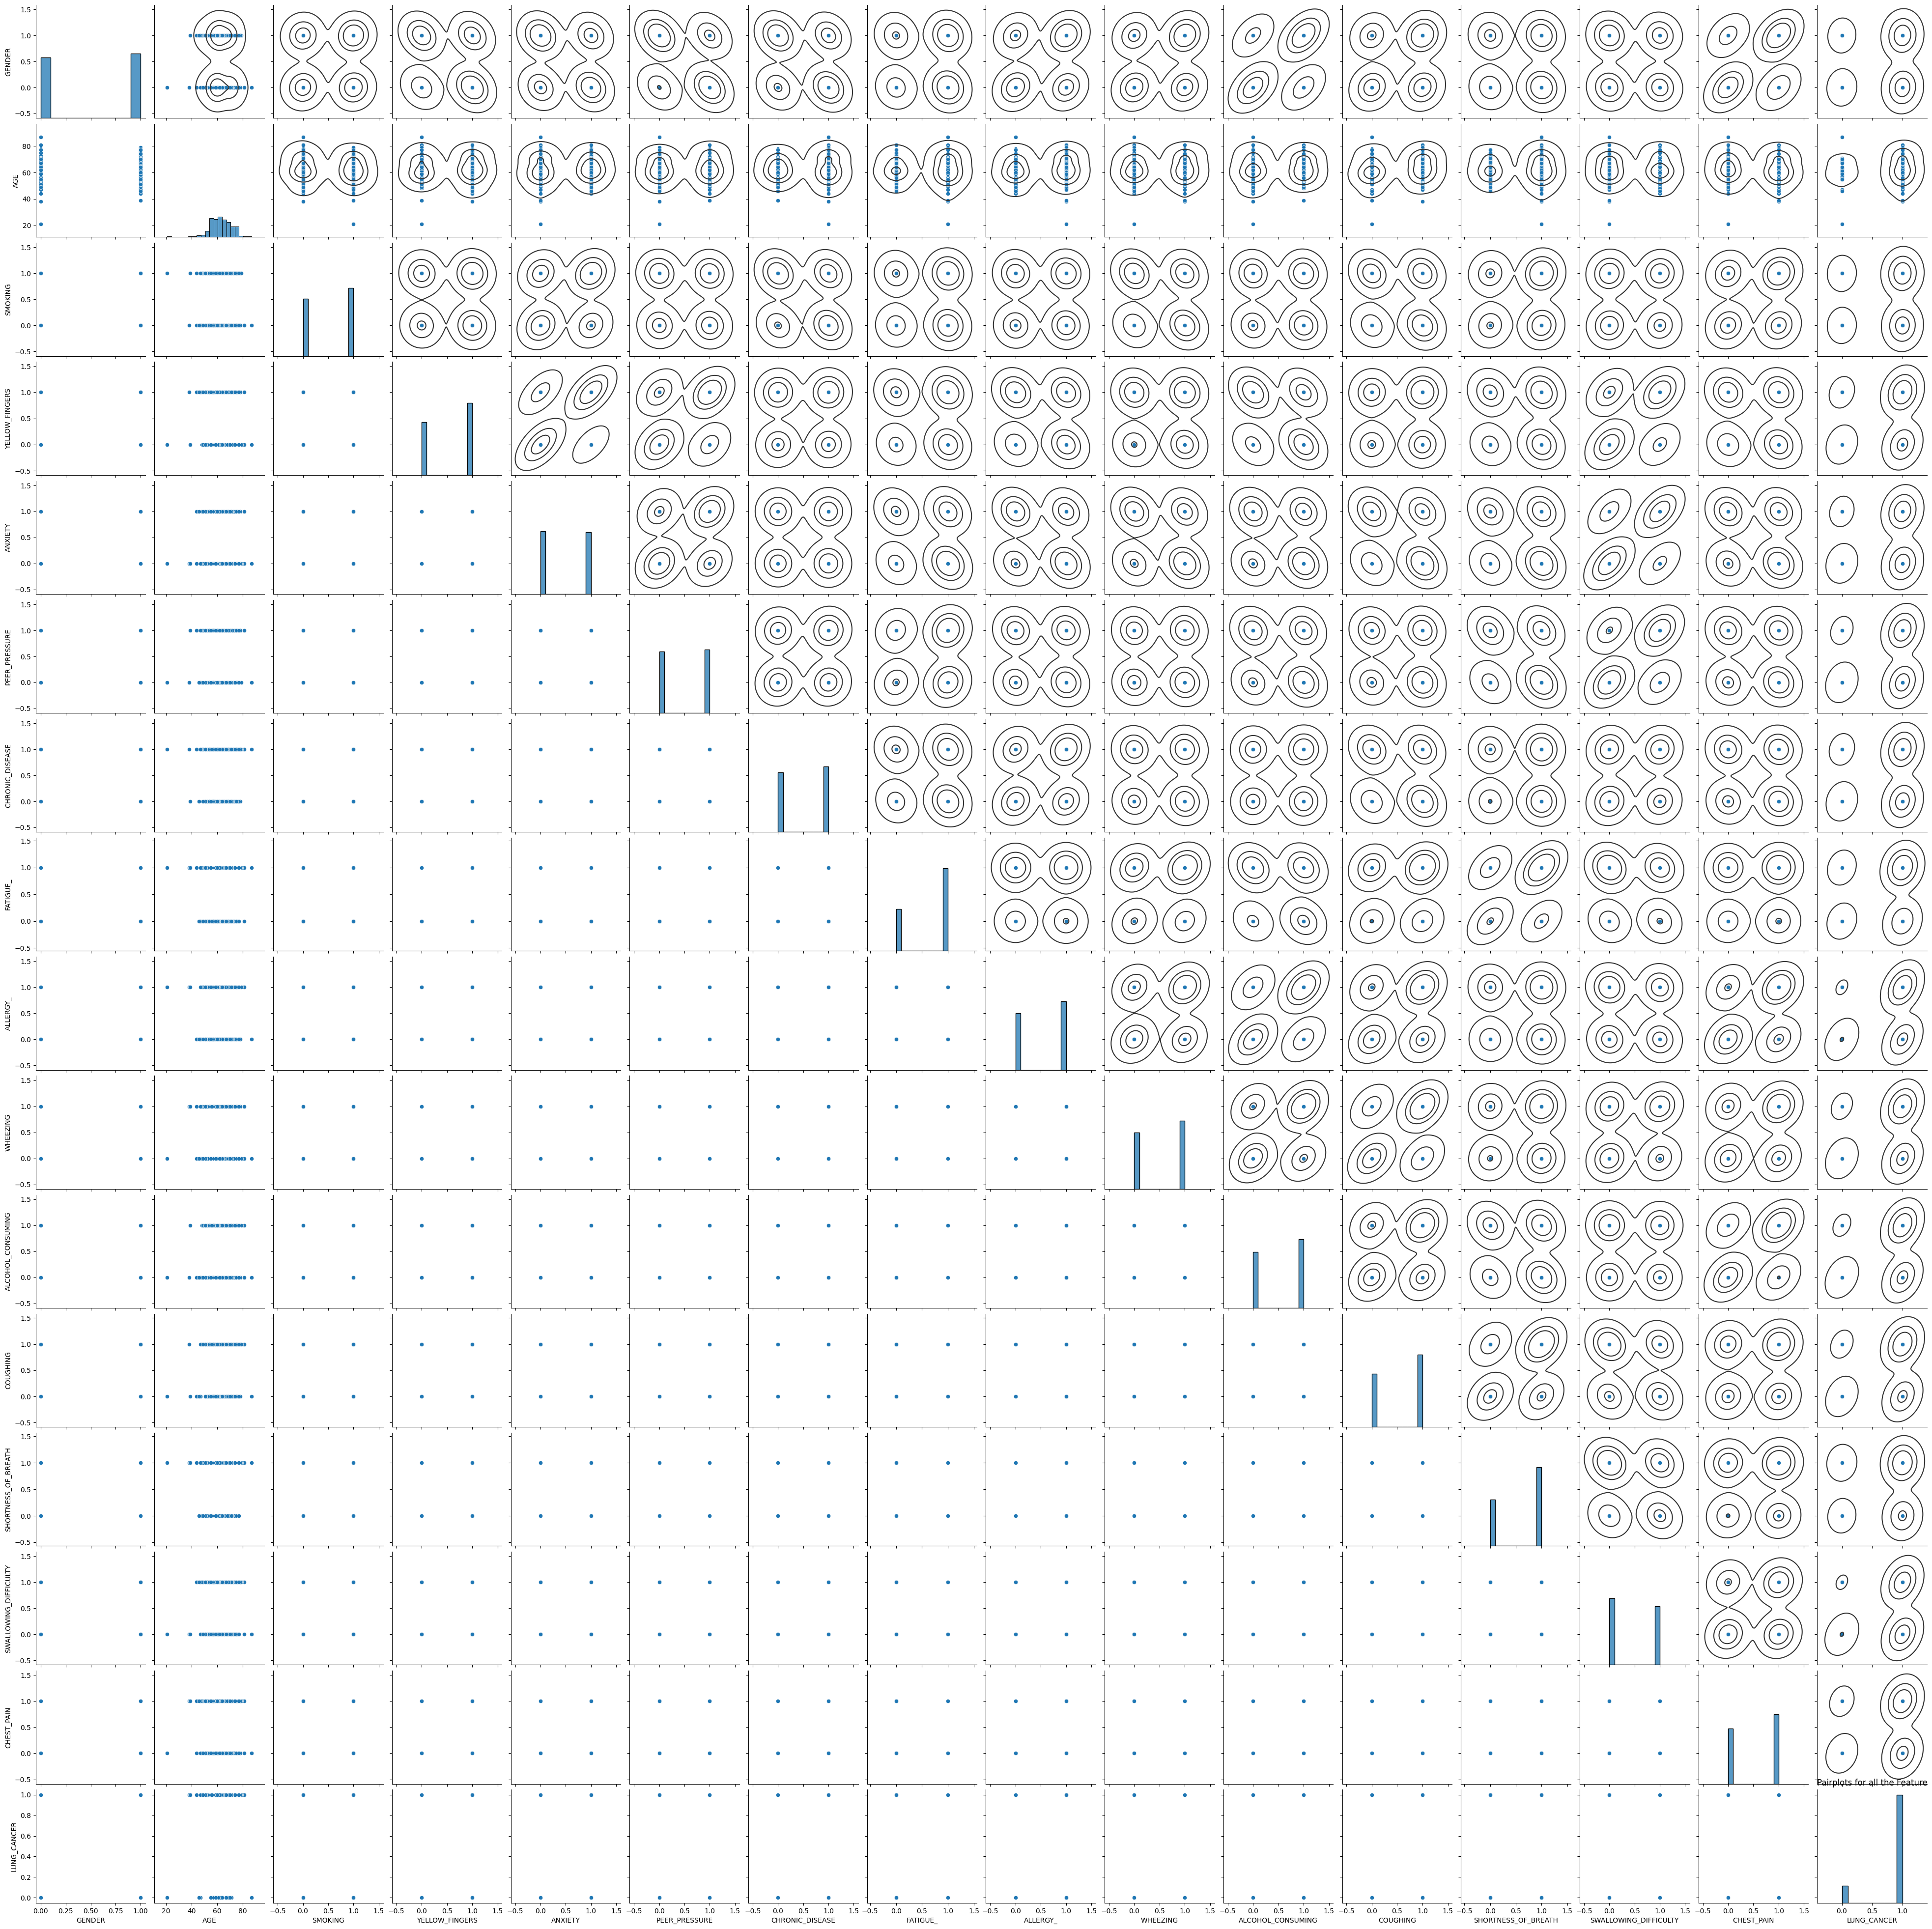

In [12]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [13]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (276, 15) (276,) 
Training set  --->  (220, 15) (220,) 
Testing set   --->  (56, 15)  (56,)


In [14]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


GENDER           AGE       SMOKING  YELLOW_FINGERS       ANXIETY  \
count  2.200000e+02  2.200000e+02  2.200000e+02    2.200000e+02  2.200000e+02   
mean   8.074349e-18 -2.684721e-16  7.670632e-17    4.440892e-17  1.291896e-16   
std    1.002281e+00  1.002281e+00  1.002281e+00    1.002281e+00  1.002281e+00   
min   -9.382654e-01 -4.842374e+00 -1.056118e+00   -1.224745e+00 -1.056118e+00   
25%   -9.382654e-01 -6.899701e-01 -1.056118e+00   -1.224745e+00 -1.056118e+00   
50%   -9.382654e-01  2.097174e-03  9.468642e-01    8.164966e-01  9.468642e-01   
75%    1.065797e+00  6.941644e-01  9.468642e-01    8.164966e-01  9.468642e-01   
max    1.065797e+00  2.770366e+00  9.468642e-01    8.164966e-01  9.468642e-01   

       PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE_      ALLERGY_  \
count   2.200000e+02     2.200000e+02  2.200000e+02  2.200000e+02   
mean   -9.689219e-17    -8.074349e-18 -8.074349e-17 -1.049665e-16   
std     1.002281e+00     1.002281e+00  1.002281e+00  1.002281e+00   
min    -1.065797e+00    -1.126073e+00 -1.419048e+00 -1.065797e+00   
25%    -1.065797e+00    -1.126073e+00 -1.419048e+00 -1.065797e+00   
50%     9.382654e-01     8.880416e-01  7.046976e-01  9.382654e-01   
75%     9.382654e-01     8.880416e-01  7.046976e-01  9.382654e-01   
max     9.382654e-01     8.880416e-01  7.046976e-01  9.382654e-01   

           WHEEZING  ALCOHOL_CONSUMING      COUGHING  SHORTNESS_OF_BREATH  \
count  2.200000e+02       2.200000e+02  2.200000e+02         2.200000e+02   
mean   9.689219e-17       8.074349e-17  1.211152e-16         2.422305e-17   
std    1.002281e+00       1.002281e+00  1.002281e+00         1.002281e+00   
min   -1.095445e+00      -1.056118e+00 -1.085457e+00        -1.284758e+00   
25%   -1.095445e+00      -1.056118e+00 -1.085457e+00        -1.284758e+00   
50%    9.128709e-01       9.468642e-01  9.212706e-01         7.783569e-01   
75%    9.128709e-01       9.468642e-01  9.212706e-01         7.783569e-01   
max    9.128709e-01       9.468642e-01  9.212706e-01         7.783569e-01   

       SWALLOWING_DIFFICULTY    CHEST_PAIN  
count             220.000000  2.200000e+02  
mean                0.000000 -3.229740e-17  
std                 1.002281  1.002281e+00  
min                -0.946864 -1.075576e+00  
25%                -0.946864 -1.075576e+00  
50%                -0.946864  9.297348e-01  
75%                 1.056118  9.297348e-01  
max                 1.056118  9.297348e-01


                                          Standardardization on Testing set                                          


GENDER        AGE    SMOKING  YELLOW_FINGERS    ANXIETY  \
count  56.000000  56.000000  56.000000       56.000000  56.000000   
mean    0.457421  -0.041157   0.159978       -0.240575  -0.305000   
std     0.929806   0.818145   0.987080        1.029200   0.978465   
min    -0.938265  -1.612726  -1.056118       -1.224745  -1.056118   
25%    -0.938265  -0.574626  -1.056118       -1.224745  -1.056118   
50%     1.065797  -0.228592   0.946864       -1.224745  -1.056118   
75%     1.065797   0.521148   0.946864        0.816497   0.946864   
max     1.065797   2.078299   0.946864        0.816497   0.946864   

       PEER_PRESSURE  CHRONIC_DISEASE   FATIGUE_   ALLERGY_   WHEEZING  \
count      56.000000        56.000000  56.000000  56.000000  56.000000   
mean       -0.242700        -0.370780  -0.053783   0.150955   0.016301   
std         0.994848         0.983904   1.026818   0.987613   1.007413   
min        -1.065797        -1.126073  -1.419048  -1.065797  -1.095445   
25%        -1.065797        -1.126073  -1.419048  -1.065797  -1.095445   
50%        -1.065797        -1.126073   0.704698   0.938265   0.912871   
75%         0.938265         0.888042   0.704698   0.938265   0.912871   
max         0.938265         0.888042   0.704698   0.938265   0.912871   

       ALCOHOL_CONSUMING   COUGHING  SHORTNESS_OF_BREATH  \
count          56.000000  56.000000            56.000000   
mean            0.231513   0.347920             0.078372   
std             0.968429   0.914752             0.985657   
min            -1.056118  -1.085457            -1.284758   
25%            -1.056118  -1.085457            -1.284758   
50%             0.946864   0.921271             0.778357   
75%             0.946864   0.921271             0.778357   
max             0.946864   0.921271             0.778357   

       SWALLOWING_DIFFICULTY  CHEST_PAIN  
count              56.000000   56.000000  
mean               -0.052676    0.213553  
std                 1.004737    0.969555  
min                -0.946864   -1.075576  
25%                -0.946864   -1.075576  
50%                -0.946864    0.929735  
75%                 1.056118    0.929735  
max                 1.056118    0.929735

                                       Correlation Matrix                                       


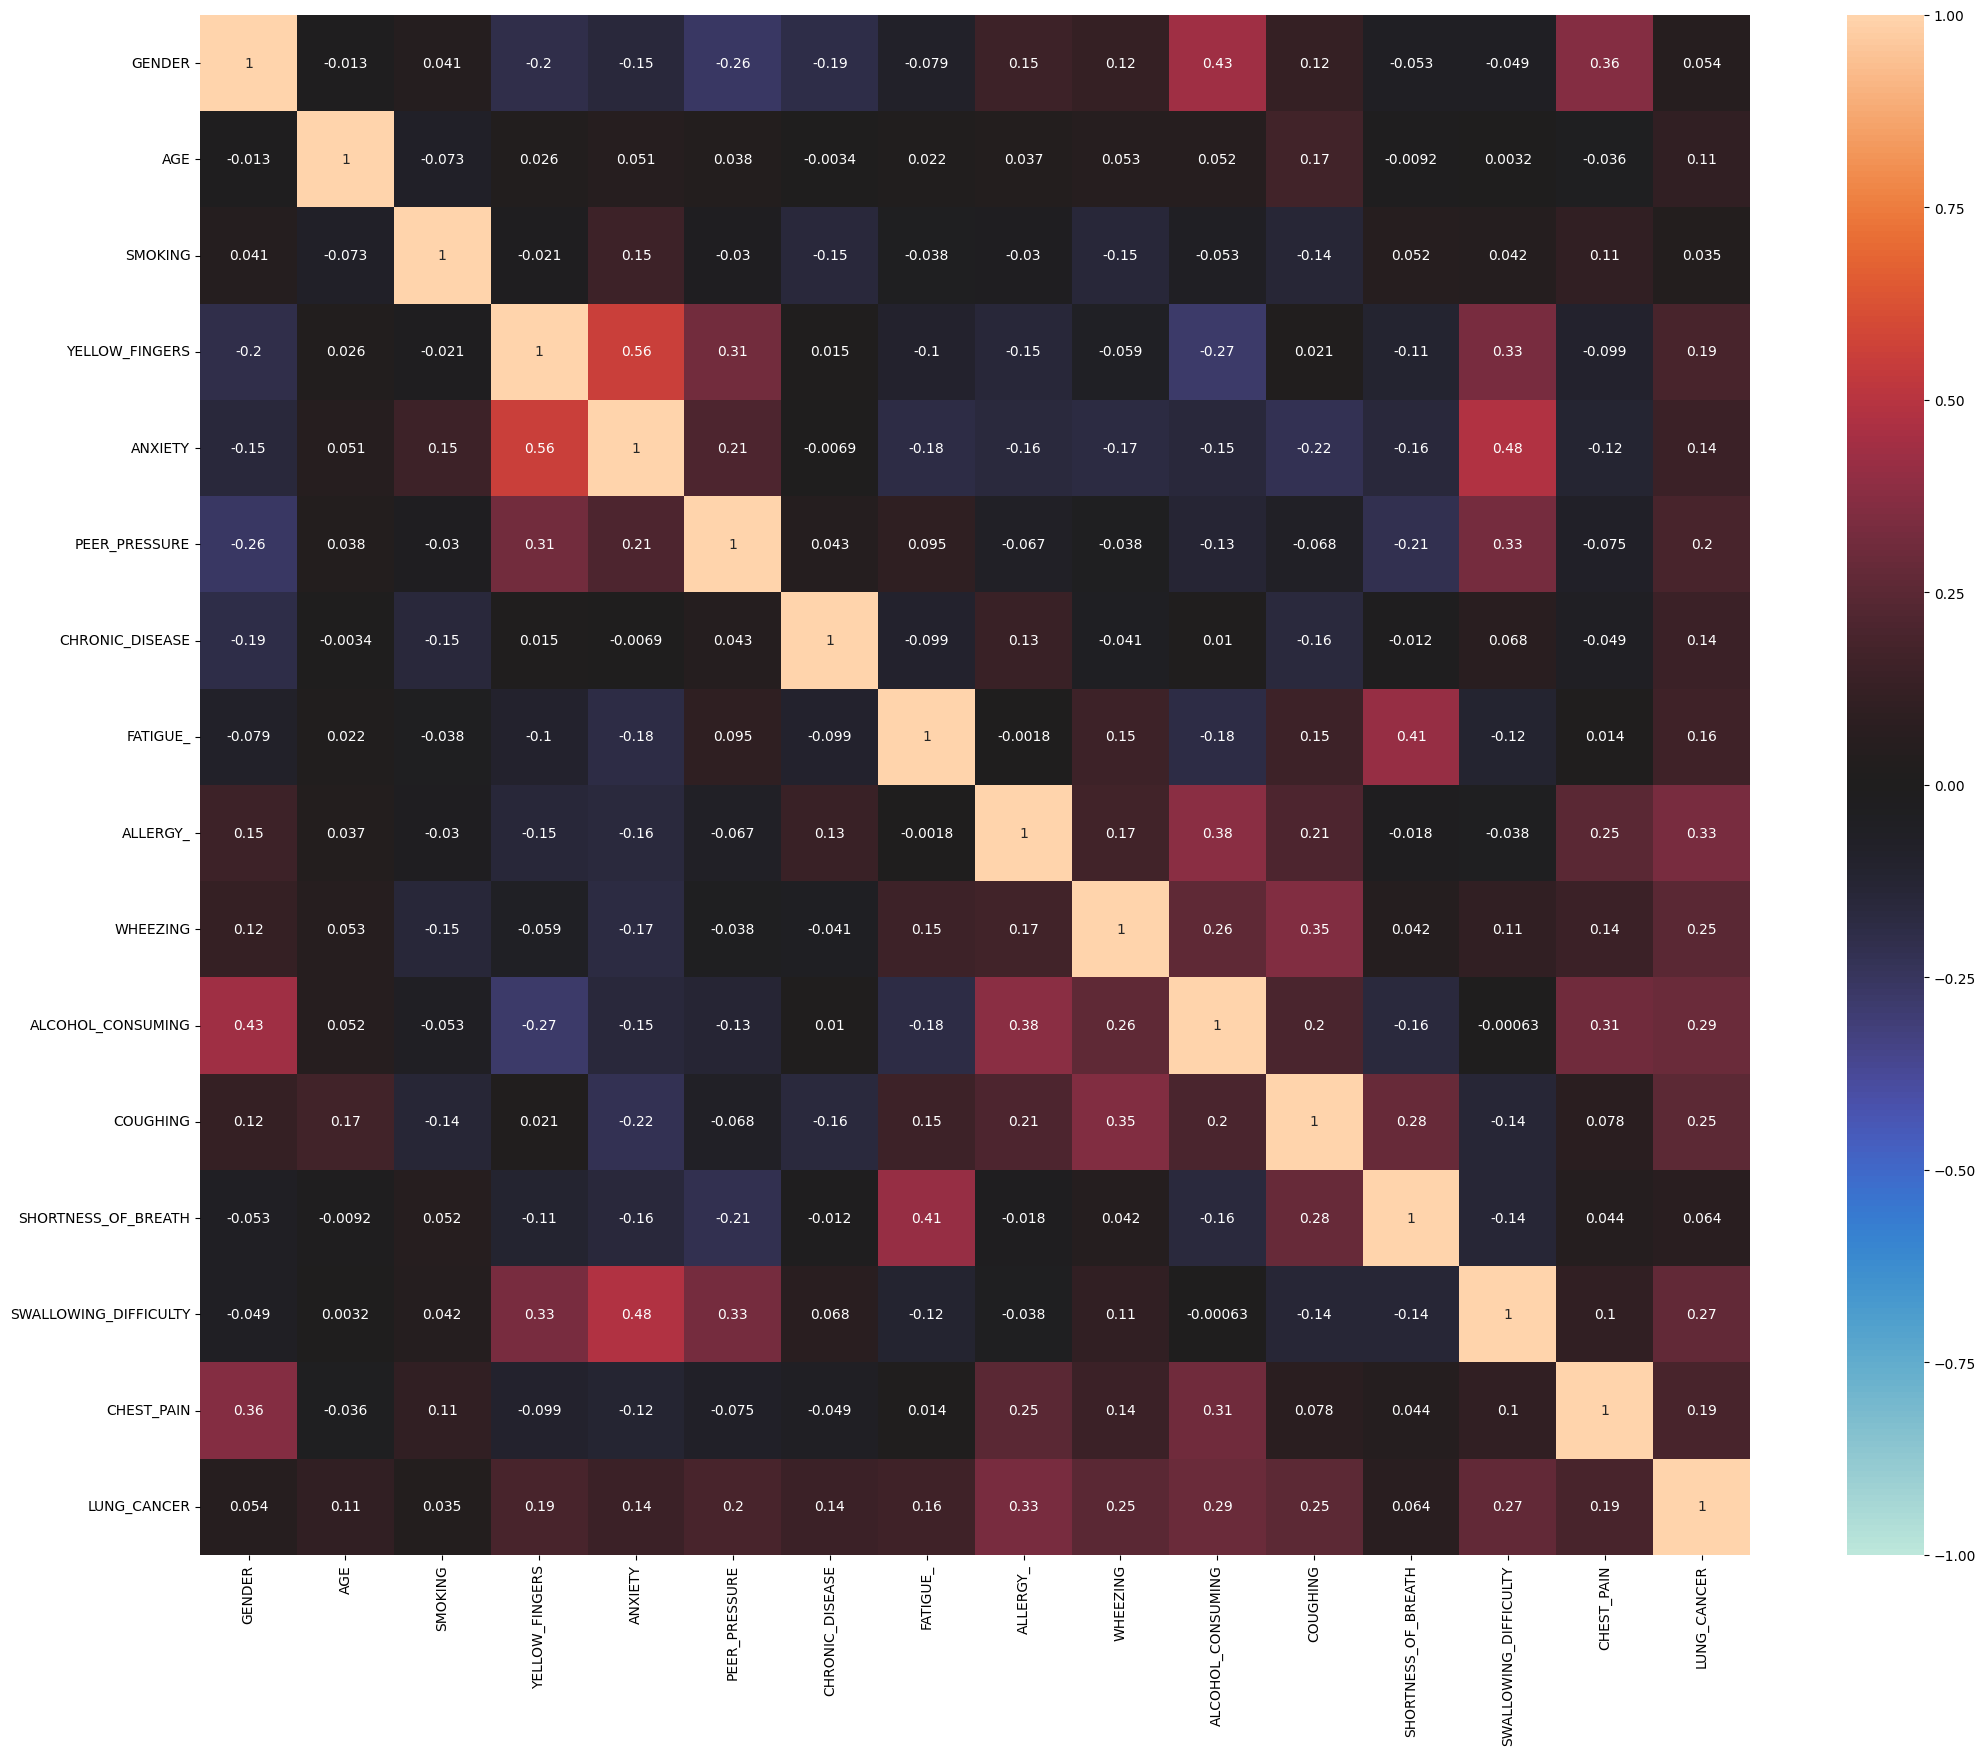

In [15]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [16]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LUNG_CANCER   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     9.622
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           5.46e-17
Time:                        13:23:44   Log-Likelihood:                -21.045
No. Observations:                 220   AIC:                             74.09
Df Residuals:                     204   BIC:                             128.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8591      0.019     46.084      0.000       0.822       0.896
GENDER                   -0.0049      0.022     -0.216      0.829      -0.049       0.039
AGE                       0.0223      0.019      1.146      0.253      -0.016       0.061
SMOKING                   0.0351      0.020      1.772      0.078      -0.004       0.074
YELLOW_FINGERS            0.0714      0.024      2.972      0.003       0.024       0.119
ANXIETY                   0.0359      0.025      1.410      0.160      -0.014       0.086
PEER_PRESSURE             0.0572      0.022      2.567      0.011       0.013       0.101
CHRONIC_DISEASE           0.0537      0.020      2.694      0.008       0.014       0.093
FATIGUE_                  0.0748      0.022      3.456      0.001       0.032       0.118
ALLERGY_                  0.0747      0.021      3.625      0.000       0.034       0.115
WHEEZING                  0.0319      0.022      1.465      0.144      -0.011       0.075
ALCOHOL_CONSUMING         0.0958      0.025      3.911      0.000       0.048       0.144
COUGHING                  0.0382      0.023      1.629      0.105      -0.008       0.084
SHORTNESS_OF_BREATH       0.0239      0.023      1.043      0.298      -0.021       0.069
SWALLOWING_DIFFICULTY     0.0389      0.024      1.637      0.103      -0.008       0.086
CHEST_PAIN                0.0307      0.021      1.443      0.151      -0.011       0.073
==============================================================================
Omnibus:                       14.788   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.818
Skew:                          -0.605   Prob(JB):                     0.000367
Kurtosis:                       3.513   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

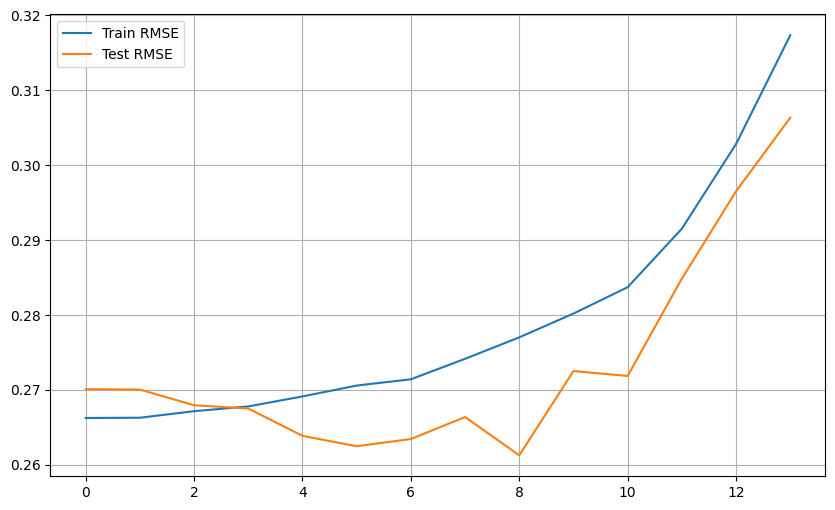

In [17]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

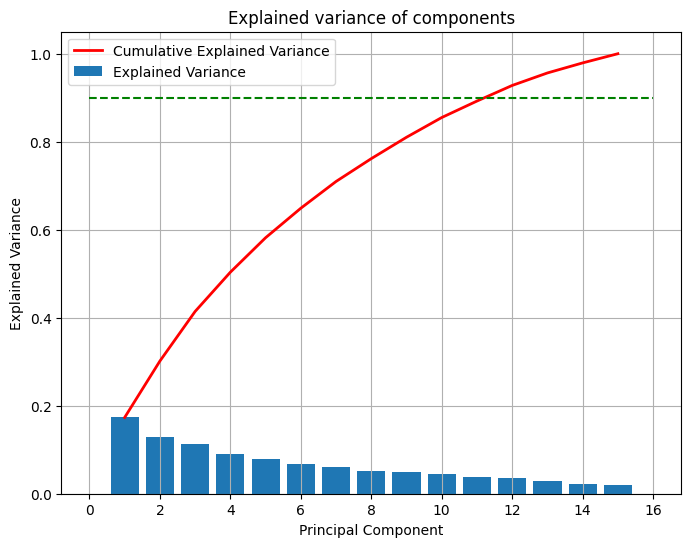

In [18]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

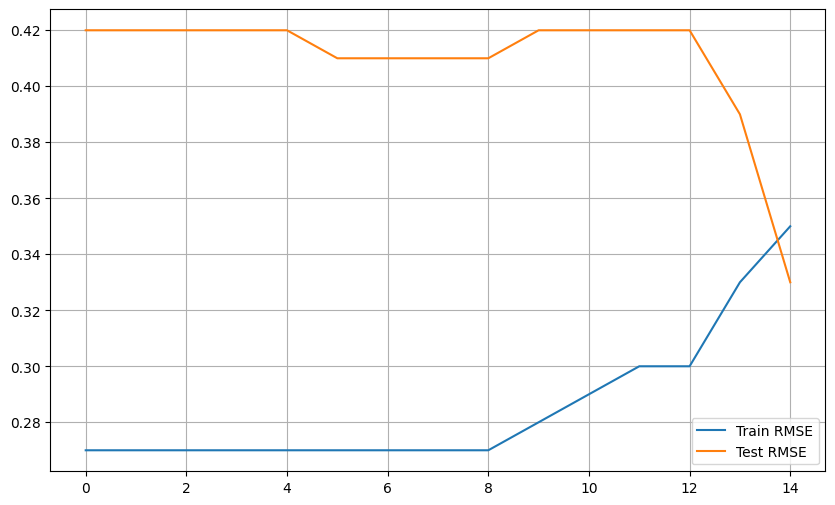

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

In [20]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-5)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

# Train_X_std = Train_X_std.loc[:,rfe.support_]
# Test_X_std = Test_X_std.loc[:,rfe.support_]

0.2705872055648454
0.2624893570010149


In [21]:
#Let us first define a function to evaluate our models

# Define a function to evaluate our models
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])

# Include all columns
columns_with_enough_uniques = Train_X_std.columns.values
print("All columns:", columns_with_enough_uniques)

# Sample from these columns if they exist
if len(columns_with_enough_uniques) > 0:
    rc = np.random.choice(columns_with_enough_uniques, 1, replace=False)
    print("Randomly chosen column:", rc)
else:
    print("No columns found.")

def Evaluate(n, pred1, pred2):
    # Plotting predicted values alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    plt.scatter(range(len(pred1)), pred1, color="blue", label="Prediction 1")
    plt.scatter(range(len(pred2)), pred2, color="red", label="Prediction 2")
    plt.legend()
    plt.title(f"Evaluation Plot {n}")
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

All columns: ['GENDER' 'AGE' 'SMOKING' 'YELLOW_FINGERS' 'ANXIETY' 'PEER_PRESSURE'
 'CHRONIC_DISEASE' 'FATIGUE_' 'ALLERGY_' 'WHEEZING' 'ALCOHOL_CONSUMING'
 'COUGHING' 'SHORTNESS_OF_BREATH' 'SWALLOWING_DIFFICULTY' 'CHEST_PAIN']
Randomly chosen column: ['AGE']


<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.00485693  0.02226484  0.03511648  0.07144342  0.03588068  0.05724821
  0.05370297  0.07482594  0.07471548  0.03194273  0.09582671  0.03823064
  0.02387813  0.03886267  0.03069612]
The Intercept of the Regresion Model was found to be  0.8590909090909091


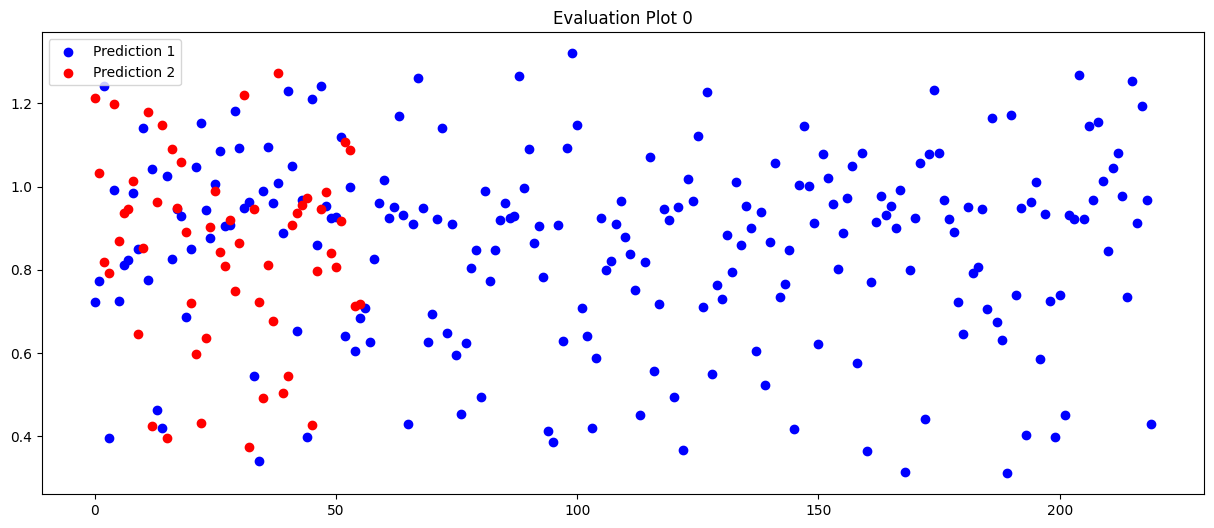



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.41435289452350593
Residual Sum of Squares (RSS) on Training set  ---> 15.596847231758085
Mean Squared Error (MSE) on Training set       ---> 0.07089476014435493
Root Mean Squared Error (RMSE) on Training set ---> 0.2662606995866174

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.3329413607157239
Residual Sum of Squares (RSS) on Training set  ---> 4.085734165616191
Mean Squared Error (MSE) on Training set       ---> 0.0729595386717177
Root Mean Squared Error (RMSE) on Training set ---> 0.27011023429651404

--------------------Residual Plots--------------------


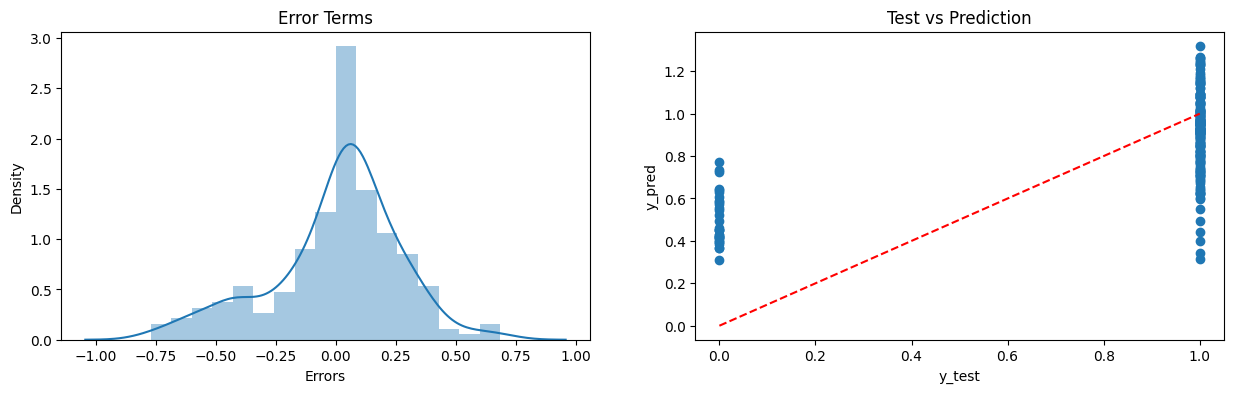

In [22]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.00485693  0.02226484  0.03511648  0.07144342  0.03588068  0.05724821
  0.05370297  0.07482594  0.07471548  0.03194273  0.09582671  0.03823064
  0.02387813  0.03886267  0.03069612]
The Intercept of the Regresion Model was found to be  0.8590909090909091


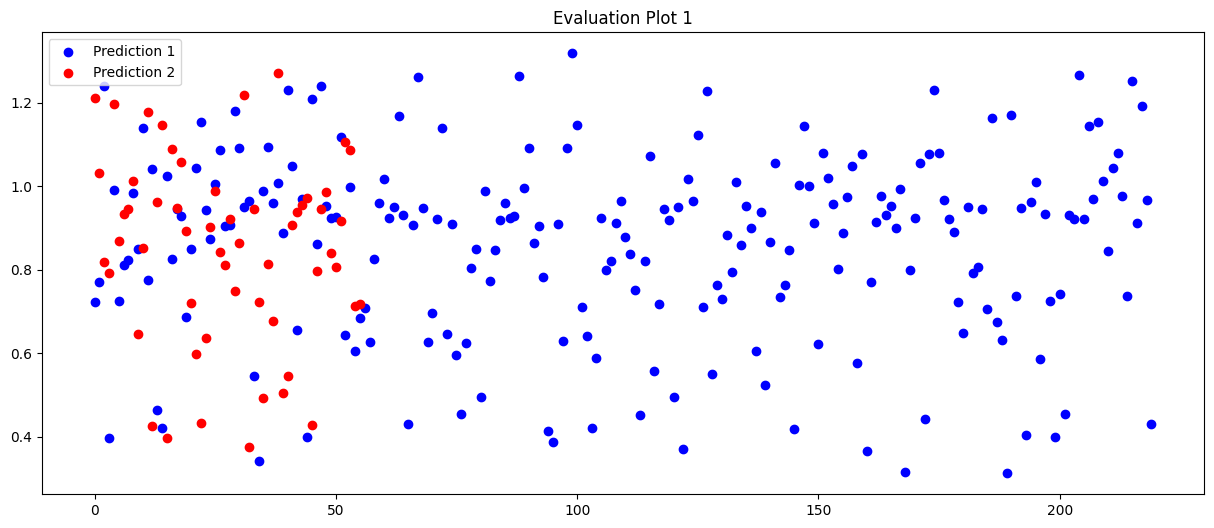



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4143456817603502
Residual Sum of Squares (RSS) on Training set  ---> 15.597039320755037
Mean Squared Error (MSE) on Training set       ---> 0.07089563327615926
Root Mean Squared Error (RMSE) on Training set ---> 0.2662623391998186

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.33356859644441805
Residual Sum of Squares (RSS) on Training set  ---> 4.0818923467779396
Mean Squared Error (MSE) on Training set       ---> 0.07289093476389177
Root Mean Squared Error (RMSE) on Training set ---> 0.2699832120038055

--------------------Residual Plots--------------------


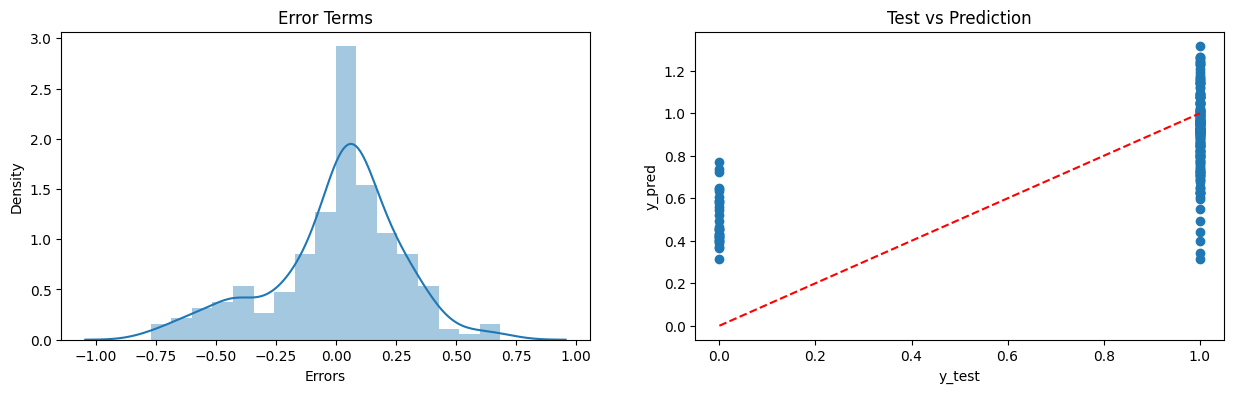

In [23]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.00485693  0.02226484  0.03511648  0.07144342  0.03588068  0.05724821
  0.05370297  0.07482594  0.07471548  0.03194273  0.09582671  0.03823064
  0.02387813  0.03886267  0.03069612]
The Intercept of the Regresion Model was found to be  0.8590909090909091


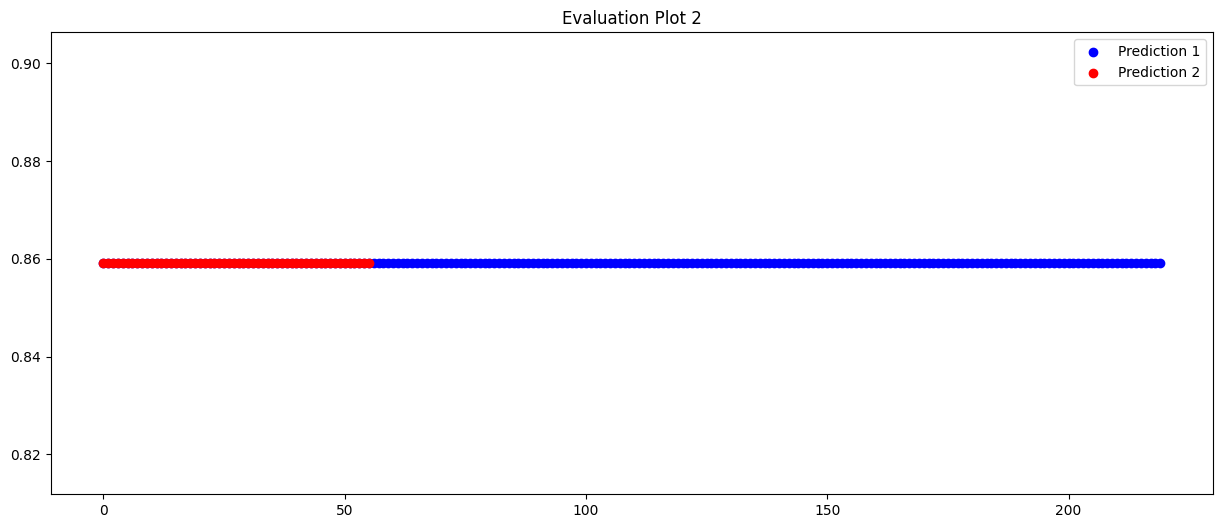



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.0
Residual Sum of Squares (RSS) on Training set  ---> 26.631818181818183
Mean Squared Error (MSE) on Training set       ---> 0.12105371900826446
Root Mean Squared Error (RMSE) on Training set ---> 0.3479277496956293

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.002314049586776834
Residual Sum of Squares (RSS) on Training set  ---> 6.139173553719008
Mean Squared Error (MSE) on Training set       ---> 0.10962809917355372
Root Mean Squared Error (RMSE) on Training set ---> 0.33110134275407843

--------------------Residual Plots--------------------


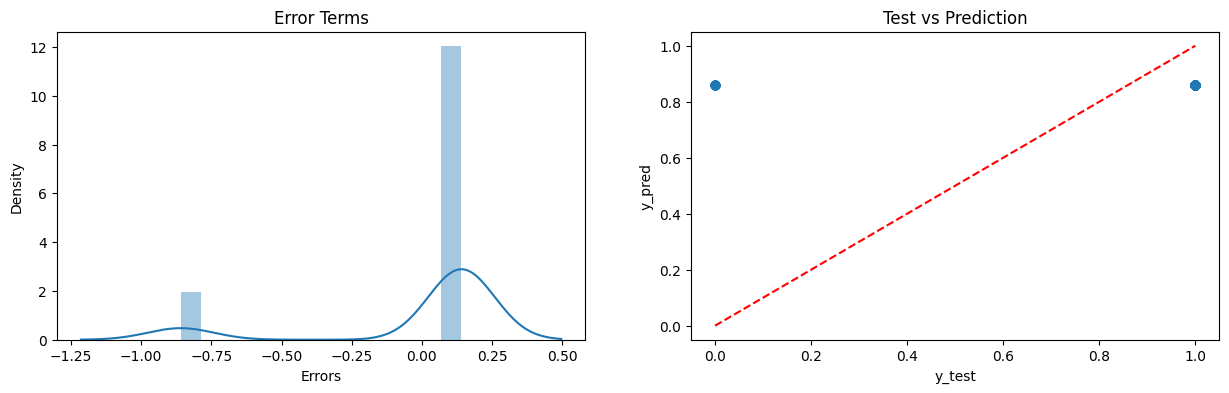

In [24]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.00485693  0.02226484  0.03511648  0.07144342  0.03588068  0.05724821
  0.05370297  0.07482594  0.07471548  0.03194273  0.09582671  0.03823064
  0.02387813  0.03886267  0.03069612]
The Intercept of the Regresion Model was found to be  0.8590909090909091


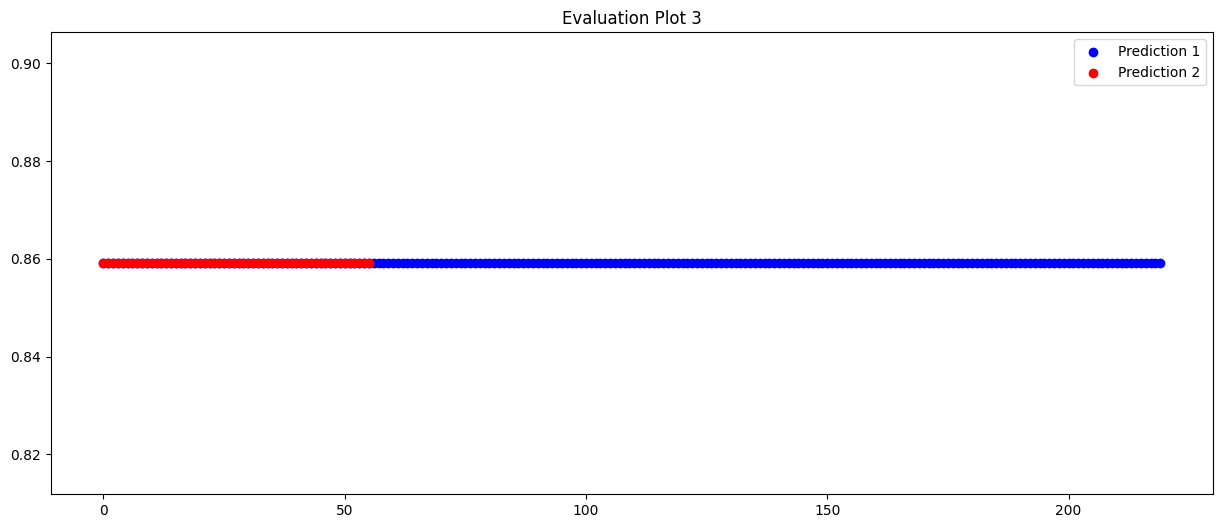



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.0
Residual Sum of Squares (RSS) on Training set  ---> 26.631818181818183
Mean Squared Error (MSE) on Training set       ---> 0.12105371900826446
Root Mean Squared Error (RMSE) on Training set ---> 0.3479277496956293

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -0.002314049586776834
Residual Sum of Squares (RSS) on Training set  ---> 6.139173553719008
Mean Squared Error (MSE) on Training set       ---> 0.10962809917355372
Root Mean Squared Error (RMSE) on Training set ---> 0.33110134275407843

--------------------Residual Plots--------------------


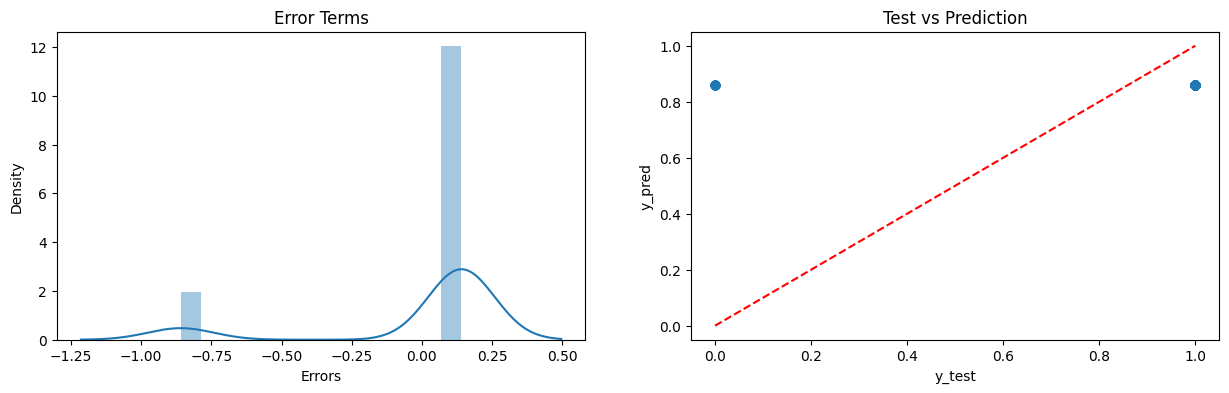

In [25]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

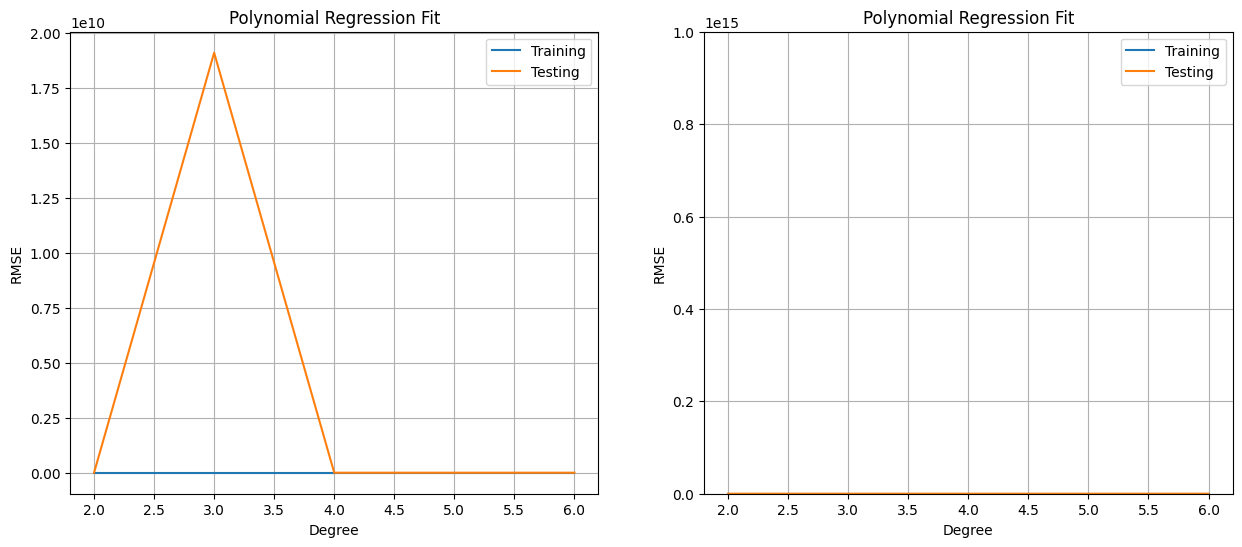

In [26]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,1e15])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.00485693  0.02226484  0.03511648  0.07144342  0.03588068  0.05724821
  0.05370297  0.07482594  0.07471548  0.03194273  0.09582671  0.03823064
  0.02387813  0.03886267  0.03069612]
The Intercept of the Regresion Model was found to be  0.8590909090909091


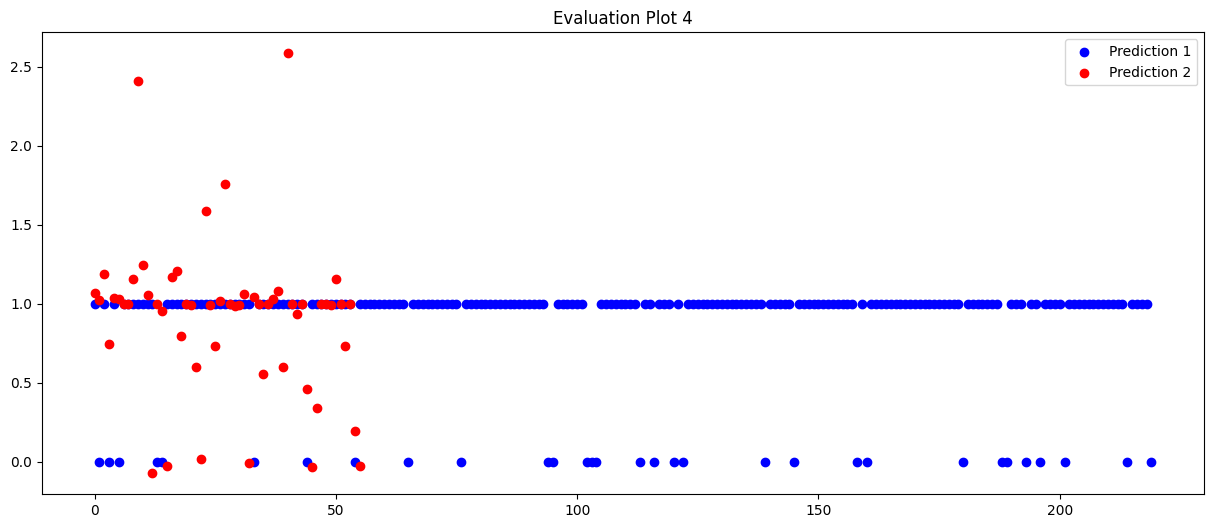



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 5.29987e-15

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -1.6986398029903889
Residual Sum of Squares (RSS) on Training set  ---> 16.52916879331613
Mean Squared Error (MSE) on Training set       ---> 0.2951637284520738
Root Mean Squared Error (RMSE) on Training set ---> 0.5432897279095876

--------------------Residual Plots--------------------


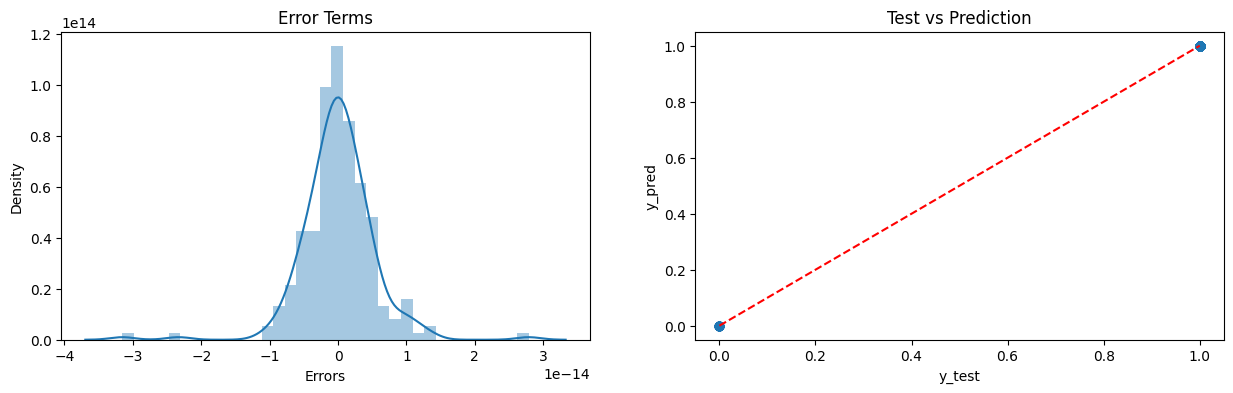

In [27]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [28]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

Train-R2   Test-R2  Train-RSS   Test-RSS  \
Multiple Linear Regression (MLR)  0.414353  0.332941  15.596847   4.085734   
Ridge Linear Regression (RLR)     0.414346  0.333569  15.597039   4.081892   
Lasso Linear Regression (LLR)     0.000000 -0.002314  26.631818   6.139174   
Elastic-Net Regression (ENR)      0.000000 -0.002314  26.631818   6.139174   
Polynomial Regression (PNR)       1.000000 -1.698640   0.000000  16.529169   

                                  Train-MSE  Test-MSE    Train-RMSE  Test-RMSE  
Multiple Linear Regression (MLR)   0.070895  0.072960  2.662607e-01   0.270110  
Ridge Linear Regression (RLR)      0.070896  0.072891  2.662623e-01   0.269983  
Lasso Linear Regression (LLR)      0.121054  0.109628  3.479277e-01   0.331101  
Elastic-Net Regression (ENR)       0.121054  0.109628  3.479277e-01   0.331101  
Polynomial Regression (PNR)        0.000000  0.295164  5.299870e-15   0.543290

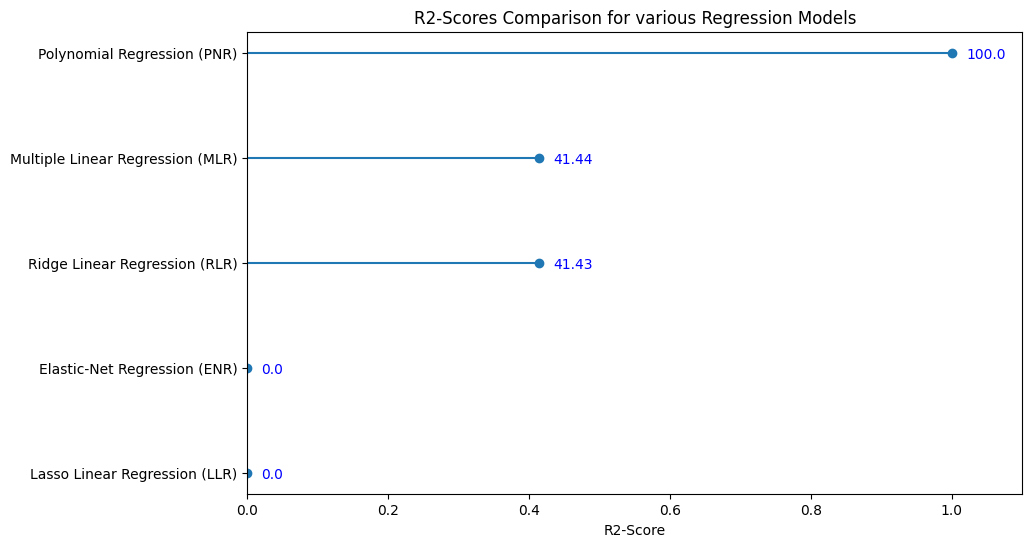

In [29]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()